<a href="https://colab.research.google.com/github/duaneywadey/Jupyter-notebooks-and-CSV-files/blob/colab-notebooks-1/LaptopPriceAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
# Importing the libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [45]:
# Importing the dataset

df = pd.read_csv('https://raw.githubusercontent.com/duaneywadey/Jupyter-notebooks-and-CSV-files/main/CSV%20Files/file_name%20(1).csv')
df.head()

,Name,Price
0,"HP Chromebook x360 11 G4 11.6"" HD Touch + Pen ...",$699
1,"HP ProBook 440 G8 14"" HD i5-1135G7 4G LTE Busi...","$1,249"
2,"Lenovo ThinkBook 14s Yoga 14"" FHD Touch i5-113...","$1,099"
3,"HP ProBook 455 G9 15.6"" Touch Ryzen 5 5625U 16...","$1,339"
4,"HP Probook 450 G9 15.6"" HD i5-1235U 8GB/256GB ...","$1,299"


In [46]:
# Creating the CPU_name column

df['Brand'] = df['Name'].apply(lambda text: " ".join(text.split()[:1]))
df.head()

,Name,Price,Brand
0,"HP Chromebook x360 11 G4 11.6"" HD Touch + Pen ...",$699,HP
1,"HP ProBook 440 G8 14"" HD i5-1135G7 4G LTE Busi...","$1,249",HP
2,"Lenovo ThinkBook 14s Yoga 14"" FHD Touch i5-113...","$1,099",Lenovo
3,"HP ProBook 455 G9 15.6"" Touch Ryzen 5 5625U 16...","$1,339",HP
4,"HP Probook 450 G9 15.6"" HD i5-1235U 8GB/256GB ...","$1,299",HP


In [47]:
# Creating the LaptopType column

df['LaptopType'] = df['Name'].apply(lambda text: text.split()[1])
df.head()

,Name,Price,Brand,LaptopType
0,"HP Chromebook x360 11 G4 11.6"" HD Touch + Pen ...",$699,HP,Chromebook
1,"HP ProBook 440 G8 14"" HD i5-1135G7 4G LTE Busi...","$1,249",HP,ProBook
2,"Lenovo ThinkBook 14s Yoga 14"" FHD Touch i5-113...","$1,099",Lenovo,ThinkBook
3,"HP ProBook 455 G9 15.6"" Touch Ryzen 5 5625U 16...","$1,339",HP,ProBook
4,"HP Probook 450 G9 15.6"" HD i5-1235U 8GB/256GB ...","$1,299",HP,Probook


In [48]:
# Create the following columns and drop the 'Name' column

df = df[['Brand', 'LaptopType', 'Price']]
df.head()

,Brand,LaptopType,Price
0,HP,Chromebook,$699
1,HP,ProBook,"$1,249"
2,Lenovo,ThinkBook,"$1,099"
3,HP,ProBook,"$1,339"
4,HP,Probook,"$1,299"


In [49]:
# Getting rid of dollar symbols, comma, and converting the entire Price column to integer type

df['Price'] = df['Price'].str.replace('$', '')
df['Price'] = df['Price'].str.replace(',', '')
df['Price'] = df['Price'].astype('int32')

df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until


,Brand,LaptopType,Price
0,HP,Chromebook,699
1,HP,ProBook,1249
2,Lenovo,ThinkBook,1099
3,HP,ProBook,1339
4,HP,Probook,1299


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


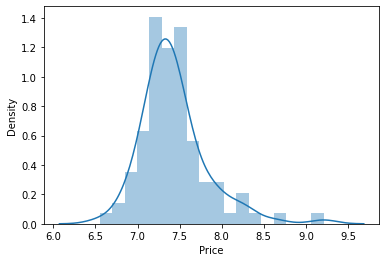

In [50]:
# Fitting the normal distribution to our data

sns.distplot(np.log(df['Price']))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


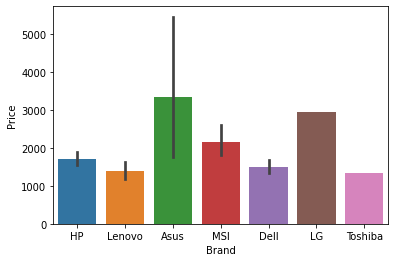

In [51]:
# Plotting the brands and prices of our laptops

sns.barplot(df['Brand'], df['Price'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


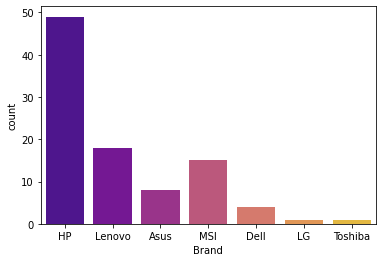

In [52]:
# Count how many brand are there

sns.countplot(df['Brand'], palette='plasma')

In [53]:
# Statistical info about our data

df['Price'].describe()

count      96.000000
mean     1859.666667
std      1133.278130
min       699.000000
25%      1339.000000
50%      1599.000000
75%      1899.000000
max      9999.000000
Name: Price, dtype: float64